# **Cancer Detection DL Model**

In [192]:
import warnings
warnings.filterwarnings('ignore')


importing *Libs*

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


In [194]:
#count the no of pics in the respective clases 0 - brain tumor and 1 for healthy
ROOT_DIR = '/content/brain_tumor_dataset'
number_of_imgs = {}
for dir in os.listdir(ROOT_DIR):
  number_of_imgs[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))


In [195]:
number_of_imgs

{'no': 98, 'yes': 155}

#We will spilt the data
* 70% for Training
* 15% for validation
* 15% for testing



In [196]:
import os
import shutil
import numpy as np
import math



# we will create a training folder
if not os.path.exists("./train"):
    os.mkdir("./train")

    for dir in os.listdir(ROOT_DIR):
        source_dir_path = os.path.join(ROOT_DIR, dir)
        destination_dir_path = os.path.join("./train", dir)
        os.makedirs(destination_dir_path, exist_ok=True) # Use exist_ok=True to avoid errors

        # --- REVISED LOGIC ---

        # 1. Get the actual population of images currently in the source folder
        available_images = os.listdir(source_dir_path)
        population_size = len(available_images)

        # 2. Calculate the desired sample size
        desired_size = math.floor(0.70 * number_of_imgs[dir])

        # 3. Make sure the size is valid (not negative and not too large)
        #    - max(0, ...) ensures the size is at least 0.
        #    - min(population_size, ...) ensures we don't request more than what's available.
        sample_size = max(0, min(population_size, desired_size))

        # Only proceed if there are images to sample
        if sample_size > 0:
            # 4. Choose the images using the corrected, safe sample_size
            images_to_move = np.random.choice(a=available_images, size=sample_size, replace=False)

            for img in images_to_move:
                original_path = os.path.join(source_dir_path, img)
                # shutil.move is safer and more efficient than copy + remove
                shutil.move(original_path, destination_dir_path)
else:
    print("The folder ./train already exists.")

In [197]:
def data_folder(p, split):
    """
    Creates a data folder by moving a percentage of files.

    Args:
        p (str): The name of the folder to create (e.g., "train").
        split (float): The percentage of files to move (e.g., 0.70 for 70%).
    """

    destination_path = f"./{p}"

    if not os.path.exists(destination_path):
        print(f"Creating '{destination_path}' directory...")
        os.makedirs(destination_path)

        for dir_name in os.listdir(ROOT_DIR):
            source_dir_path = os.path.join(ROOT_DIR, dir_name)
            destination_dir_path = os.path.join(destination_path, dir_name)

            # Create the destination sub-folder
            os.makedirs(destination_dir_path, exist_ok=True)

            # Get the list of images currently available in the source folder
            available_images = [f for f in os.listdir(source_dir_path) if os.path.isfile(os.path.join(source_dir_path, f))]
            population_size = len(available_images)

            # Calculate the number of images to move based on the *original* count
            desired_size = math.floor(split * number_of_imgs[dir_name])

            # Ensure the sample size is valid (not negative and not larger than what's available)
            sample_size = max(0, min(population_size, desired_size))

            if sample_size > 0:
                print(f"  Moving {sample_size} images from '{dir_name}' to '{p}'...")
                images_to_move = np.random.choice(a=available_images, size=sample_size, replace=False)

                for img in images_to_move:
                    original_path = os.path.join(source_dir_path, img)
                    shutil.move(original_path, destination_dir_path)
            else:
                print(f"  No images to move for '{dir_name}'.")
    else:
        print(f"The folder '{destination_path}' already exists.")

In [198]:
data_folder("val",0.15)

Creating './val' directory...
  Moving 14 images from 'no' to 'val'...
  Moving 23 images from 'yes' to 'val'...


In [199]:
data_folder("test",0.15)

Creating './test' directory...
  Moving 14 images from 'no' to 'test'...
  Moving 23 images from 'yes' to 'test'...


#Model Build

In [222]:
from keras.layers import Conv2D , MaxPool2D , Dropout , Flatten ,BatchNormalization,Dense, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras

In [243]:
#cnn model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [244]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

Preparing our data using Data Generator

In [203]:
def preprocessingImages1(path):
  """
  input : path
  output : prepeocesseed image
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1./255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [204]:
path= "/content/train"
train_data=preprocessingImages1(path)

Found 176 images belonging to 2 classes.


In [205]:
def preprocessingImages2(path):
  """
  input : path
  output : prepeocesseed image
  """
  image_data=ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [206]:
test_data=preprocessingImages2("/content/test")

Found 37 images belonging to 2 classes.


In [207]:
val_data=preprocessingImages2("/content/val")

Found 37 images belonging to 2 classes.


In [245]:
#Early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 7, verbose= 1, mode='auto')

mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1)
cd=[es,mc,lr_scheduler]



# Model Training

In [246]:
hs=model.fit(train_data,
             steps_per_epoch=8,
             epochs=50,
             verbose=1,
             callbacks=cd,
             validation_data=val_data,
             validation_steps=16)

Epoch 1/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4695 - loss: 1.0696
Epoch 1: val_accuracy improved from -inf to 0.62162, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4772 - loss: 1.0446 - val_accuracy: 0.6216 - val_loss: 0.6326 - learning_rate: 0.0010
Epoch 2/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.5885 - loss: 0.6423
Epoch 2: val_accuracy improved from 0.62162 to 0.67568, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 318ms/step - accuracy: 0.5919 - loss: 0.6431 - val_accuracy: 0.6757 - val_loss: 0.5089 - learning_rate: 0.0010
Epoch 3/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 0.6931 - loss: 0.6736
Epoch 3: val_accuracy improved from 0.67568 to 0.83784, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - accuracy: 0.6988 - loss: 0.6656 - val_accuracy: 0.8378 - val_loss: 0.5341 - learning_rate: 0.0010
Epoch 4/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7621 - loss: 0.5956
Epoch 4: val_accuracy did not improve from 0.83784
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.7605 - loss: 0.5882 - val_accuracy: 0.7838 - val_loss: 0.4859 - learning_rate: 0.0010
Epoch 5/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - accuracy: 0.7146 - loss: 0.5973
Epoch 5: val_accuracy did not improve from 0.83784
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.7022 - loss: 0.6178 - val_accuracy: 0.8378 - val_loss: 0.4543 - learning_rate: 0.0010
Epoch 6/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.7922 - loss: 0.5716
Epoch 6: val_accuracy did not improve from 0.83784
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.7874 - loss: 0.5745 - val_accuracy: 0.8108 - val_loss: 0.4277 - learning_rate: 0.0010
Epoch 7/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [247]:
#Model Graphic Interpretation
h=hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

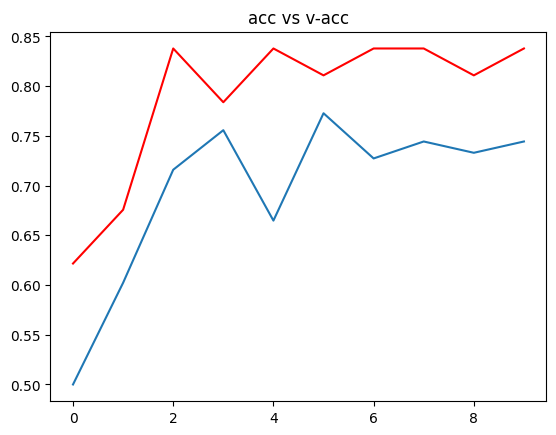

In [248]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()


# Model Accuracy

In [249]:
from tensorflow.keras.models import load_model


best_model = load_model('best_model.h5')

loss, acc = best_model.evaluate(test_data)

print(f"The accuracy of the BEST model on the test set is {acc*100:.2f} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step - accuracy: 0.7829 - loss: 0.5648
The accuracy of the BEST model on the test set is 78.38 %


# Testing

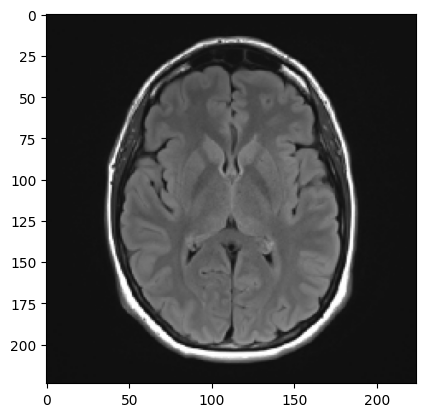

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
Raw prediction probability: 0.4604
The MRI scan appears to be normal (no brain tumor).


In [252]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


model = load_model('best_model.h5')

path = "/content/test/no/no.jpg"

img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img) / 255

plt.imshow(input_arr)
plt.show()

input_arr = np.expand_dims(input_arr, axis=0)


prediction_prob = model.predict(input_arr)[0][0]

print(f"Raw prediction probability: {prediction_prob:.4f}")

if prediction_prob > 0.5:

    print("The MRI scan indicates a brain tumor.")
else:

    print("The MRI scan appears to be normal (no brain tumor).")